#Drive mount

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Install required libraries 

In [ ]:
!pip install Augmentor
!pip install mlflow --quiet


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 70.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.5/147.5 KB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.4/82.4 KB 9.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 KB 41.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 KB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 KB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 KB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import os
import shutil
from glob import glob
from PIL import Image
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow import keras
from keras import layers
from functools import partial
import seaborn as sn
import matplotlib.pyplot as plt
AUTO = tf.data.experimental.AUTOTUNE
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix
from getpass import getpass
import mlflow
import IPython
from keras.models import Sequential, load_model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
# !unzip '/content/drive/MyDrive/Traffic Prediction/Updated unmasked dataset/ottawa_labeled.zip' -d '/content/drive/MyDrive/Traffic Prediction/Updated unmasked dataset'

# Data Augmentation

In [ ]:
# Create an instance of the ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1.0/255,
                            rotation_range=10,
                            width_shift_range=0.1,
                            height_shift_range=0.1,
                            shear_range=0.2,
                            brightness_range=(0.5,1.5),
                            # channel_shift_range=(0.5,1.5),
                            zoom_range=0.2,
                            horizontal_flip=True,
                            fill_mode='nearest', # nearest
                            cval=1
                            )

In [ ]:
#importing the required libraries
import os
import shutil
import numpy as np
import pandas as pd
import random
from PIL import Image

from keras_preprocessing.image import ImageDataGenerator

# -----INPUT-----------
class_name = 'lc'
num_of_samples = 200
unreadables = []
msgs = []

#there are three types of congestion level and this is argumentation for low-level only. For the remaining two types, the below paths will have to be adjusted
source_dir = '/content/drive/MyDrive/Traffic Prediction/Updated unmasked dataset/ottawa_labeled/train/Low' 
target_dir = '/content/drive/MyDrive/Traffic Prediction/Updated unmasked dataset/ottawa_labeled_argumented/Low'
jpg = ''
try:
    # for jpg in os.listdir(source_dir): 
    for jpg in random.sample([jpg for jpg in os.listdir(source_dir)], num_of_samples): 
            
        p = os.path.join(source_dir, jpg)
        img = Image.open(p)  # this is a PIL image
        x = np.array(img)  # this is a Numpy array with shape (3, xxx, xxx)
        x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, xxx, xxx)

        # the .flow() command below generates batches of randomly transformed images
        # and saves the results to the `preview/` directory
        num_of_variations = 0
        
        for batch in train_datagen.flow(x, None, batch_size=1,
                    save_to_dir=os.path.join(target_dir),
                    save_format='jpg',
                    save_prefix='aug_low',
                    # seed=42,
                    ):
            num_of_variations += 1
            if num_of_variations >= 6:
                break  # otherwise the generator would loop indefinitely

except Exception as e:
    unreadables.append(jpg)
    msgs.append(e)
    pass


#Move original dataset into augmented dataset


In [ ]:
# move original dataset into augmented dataset

path = '/content/drive/MyDrive/Traffic Prediction/Updated unmasked dataset/ottawa_labeled/train/High/'
# for img in random.sample([img for img in os.listdir(path)], 1500):
for img in os.listdir(path):
  shutil.move(path+img, '/content/drive/MyDrive/Traffic Prediction/Updated unmasked dataset/ottawa_labeled_argumented/High/'+img)

path = '/content/drive/MyDrive/Traffic Prediction/Updated unmasked dataset/ottawa_labeled/train/Low/'
for img in random.sample([img for img in os.listdir(path)], 1000):
# for img in os.listdir(path):
  shutil.move(path+img, '/content/drive/MyDrive/Traffic Prediction/Updated unmasked dataset/ottawa_labeled_argumented/Low/'+img)

path = '/content/drive/MyDrive/Traffic Prediction/Updated unmasked dataset/ottawa_labeled/train/Medium/'
# for img in random.sample([img for img in os.listdir(path)], 1500):
for img in os.listdir(path):
  shutil.move(path+img, '/content/drive/MyDrive/Traffic Prediction/Updated unmasked dataset/ottawa_labeled_argumented/Medium/'+img)

In [ ]:
#original+augmented dataset folder path
dir_path = r'/content/drive/MyDrive/Traffic Prediction/Updated unmasked dataset/ottawa_labeled_argumented'
# Iterate directory
for os_folder in os.listdir(dir_path):
  if os.path.isdir(os.path.join(dir_path, os_folder)):
    count = 0
    for path in os.listdir(dir_path + '/' + os_folder):
        # check if current path is a file
        if os.path.isfile(os.path.join(dir_path+'/'+os_folder, path)):
            count += 1
    print(os_folder, count)

High 1562
Medium 1599
Low 1505


In [ ]:
import os
id = []
classes = []
for img_fold in os.listdir("/content/drive/MyDrive/Traffic Prediction/Updated unmasked dataset/ottawa_labeled_argumented"):
  for img in os.listdir("/content/drive/MyDrive/Traffic Prediction/Updated unmasked dataset/ottawa_labeled_argumented/"+img_fold):
       
      #  id.append("/content/drive/MyDrive/dataset/train/"+img_fold+'/'+img)
      #  classes.append(class_dic[img_fold])
       id.append(img)
       classes.append(img_fold)

In [ ]:
# Importing Pandas to create DataFrame
import pandas as pd
  
# Creating DataFrame and Storing it in variable df

data = {'id': id,
        'class': classes}
df = pd.DataFrame(data) 
df.to_csv('/content/drive/MyDrive/Traffic Prediction/csv/Updated_unmasked.csv')

In [ ]:
#read traffic.csv file

# df=pd.read_csv('/content/drive/MyDrive/Traffic Prediction/traffic.csv')

df=pd.read_csv('/content/drive/MyDrive/Traffic Prediction/csv/Updated_unmasked.csv',index_col=0)

In [ ]:
df.head()

,id,class
0,2032_2022-12-23-10-35.jpg,High
1,2005_2022-12-22-12-52.jpg,High
2,2006_2022-12-22-18-04.jpg,High
3,2026_2022-12-22-20-04.jpg,High
4,2007_2022-12-23-06-13.jpg,High


In [ ]:
print("Total number of images in the dataset: ", len(df))

label_count = df['class'].value_counts()
print(label_count)

Total number of images in the dataset:  4666
Medium    1599
High      1562
Low       1505
Name: class, dtype: int64


If you want to use "categorical_crossentropy", the labels should be one-hot-encoded. When your labels are given as an integer, changing to "sparse_categorical_crossentropy" is required. The advantage of using "categorical_crossentropy" is that it can give you class probabilities, which might be useful in some cases. Or load with flow_from_directory, flow_from_dataframe then use class_mode='categorical'

#Resize data

In [ ]:
import cv2
path = '/content/drive/MyDrive/Traffic Prediction/Updated unmasked dataset/ottawa_labeled_argumented/'
dataset_path = df['class']

im_size = 300
count = 0
images = []
labels = []

for i in dataset_path:
    data_path = path + str(i)

    filenames = df['id'][count]

    count+=1
    #for f in filenames:
    img = cv2.imread(data_path + '/' + filenames)
    img = cv2.resize(img, (im_size, im_size))
    cv2.imwrite('/content/drive/MyDrive/Traffic Prediction/Updated unmasked dataset/ottawa_argumented_resized/'+str(i)+'/'+filenames, img)
    # images.append(img)
    # labels.append(i)

In [ ]:
#original+augmented dataset folder path
dir_path = r'/content/drive/MyDrive/Traffic Prediction/Updated unmasked dataset/ottawa_argumented_resized/'
# Iterate directory
for os_folder in os.listdir(dir_path):
  if os.path.isdir(os.path.join(dir_path, os_folder)):
    count = 0
    for path in os.listdir(dir_path + '/' + os_folder):
        # check if current path is a file
        if os.path.isfile(os.path.join(dir_path+'/'+os_folder, path)):
            count += 1
    print(os_folder, count)

# Low 1537
# Medium 1599
# High 1562
# Total 4698

Low 1537
Medium 1599
High 1562


# Data preparation with resized images

In [ ]:
#resized original+augmented dataset folder path
# dir_path = r'/content/drive/MyDrive/Traffic Prediction/Updated unmasked dataset/ottawa_argumented_resized/'
# Iterate directory
dir_path=r'/content/drive/MyDrive/Traffic Prediction/resized ottawa benchmark set/test'
for os_folder in os.listdir(dir_path):
  if os.path.isdir(os.path.join(dir_path, os_folder)):
    count = 0
    for path in os.listdir(dir_path + '/' + os_folder):
        # check if current path is a file
        if os.path.isfile(os.path.join(dir_path+'/'+os_folder, path)):
            count += 1
    print(os_folder, count)

High 57
Medium 82
Low 83


In [ ]:
id = []
classes = []
for img_fold in os.listdir("/content/drive/MyDrive/Traffic Prediction/resized ottawa benchmark set/test"):
  for img in os.listdir("/content/drive/MyDrive/Traffic Prediction/resized ottawa benchmark set/test/"+img_fold):
# for img_fold in os.listdir('/content/drive/MyDrive/Traffic Prediction/Updated unmasked dataset/ottawa_argumented_resized/'):
#   for img in os.listdir('/content/drive/MyDrive/Traffic Prediction/Updated unmasked dataset/ottawa_argumented_resized/'+img_fold):
       
      #  id.append("/content/drive/MyDrive/dataset/train/"+img_fold+'/'+img)
      #  classes.append(class_dic[img_fold])
       id.append(img)
       classes.append(img_fold)

In [ ]:
# Importing Pandas to create DataFrame
import pandas as pd
  
# Creating DataFrame and Storing it in variable df

data = {'id': id,
        'class': classes}
df = pd.DataFrame(data) 
df.to_csv('/content/drive/MyDrive/Traffic Prediction/csv/benchmark_test_updated_resized_traffic.csv')

In [ ]:
#read traffic.csv file
df=pd.read_csv('/content/drive/MyDrive/Traffic Prediction/csv/benchmark_test_updated_resized_traffic.csv',index_col=0)
# df=pd.read_csv('/content/drive/MyDrive/Traffic Prediction/csv/Updated_unmasked.csv',index_col=0)

In [ ]:
len(df.index)
# print(type(df))
# print(len(df.index))

222

In [ ]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
y=df['class'].values
# print(y)
y_labelencoder = LabelEncoder()
y = y_labelencoder.fit_transform(y)
# print(y)

In [ ]:
# img = cv2.imread('/content/drive/MyDrive/Traffic Prediction/resized ottawa benchmark set/test/Medium/2006_2022-12-22-11-38.jpg')
# print("Image",img)

In [ ]:
# path = '/content/drive/MyDrive/Traffic Prediction/Updated unmasked dataset/ottawa_argumented_resized'

path = '/content/drive/MyDrive/Traffic Prediction/resized ottawa benchmark set/test/'

dataset_path = df['class']

im_size = 300
count = 0
images = []
labels = []

for i in dataset_path:
    data_path = path + str(i)
    filenames = df['id'][count]
    count+=1
    # print(data_path)
    # print(filenames)
    # # for f in filenames:
    img = cv2.imread(data_path + '/' + filenames)
    # print(img)
    images.append(img)
    labels.append(i)

In [ ]:
print(len(images))
print(len(labels))

222
222


In [ ]:
#This model takes input images of shape (300, 300, 3), and the input data should range [0, 255]. 

images = np.array(images)
images = images.astype('float32') / 255.0
images.shape

(222, 300, 300, 3)

# One Hot Encoding using Keras

In [ ]:
import gc

gc.collect()

803

In [ ]:
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

# encode the labels
encoder = LabelEncoder()
integer_labels = encoder.fit_transform(labels)

# one-hot encode the integer labels
one_hot_labels = to_categorical(integer_labels)


In [ ]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


images, Y = shuffle(images, one_hot_labels, random_state=1)


# train_x, test_x, train_y, test_y = train_test_split(images, Y, test_size=0.2, random_state=415)

#inpect the shape of the training and testing.
# print(train_x.shape)
# print(train_y.shape)
# print(test_x.shape)
# print(test_y.shape)

# Ml flow

In [ ]:
import requests
from getpass import getpass
import datetime

In [ ]:
#@title Enter the repository name for the project:

REPO_NAME= "BigCodeGen" #@param {type:"string"}

In [ ]:
#@title Enter the repository name for the project:

REPO_OWNER= "Omdena" #@param {type:"string"}

In [ ]:
#@title Enter the username of your DAGsHub account:

USER_NAME = "akito_shine" #@param {type:"string"}

In [ ]:
os.environ['MLFLOW_TRACKING_USERNAME'] = USER_NAME
os.environ['MLFLOW_TRACKING_PASSWORD'] = getpass('Enter your DAGsHub access token or password: ')

mlflow.set_tracking_uri(f'https://dagshub.com/{REPO_OWNER}/{REPO_NAME}.mlflow')

Enter your DAGsHub access token or password: ··········


# Training

In [ ]:
# from tensorflow.keras import layers
# # Hyperparameters
# IMG_SIZE = 300
# BATCH_SIZE = 32
# EPOCHS = 10


# # Define the input layer
# inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))

# # Load the pre-trained EfficientNetB3 model
# base_model = tf.keras.applications.EfficientNetB3(
#     include_top=False,
#     weights='imagenet',
#     input_tensor=inputs,
#     input_shape=(IMG_SIZE, IMG_SIZE, 3),
#     pooling=None,
#     classes=None
# )

# # Freeze the pre-trained weights
# base_model.trainable = False

# # Add a new classifier head on top of the base model
# x = base_model.output
# x = layers.GlobalAveragePooling2D()(x)
# x = layers.Dense(128, activation='relu')(x)
# x = layers.Dropout(0.5)(x)
# outputs = layers.Dense(5, activation='softmax')(x)

# # Define the model
# model = keras.Model(inputs, outputs)

# # Compile the model
# model.compile(
#     optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
#     loss='categorical_crossentropy',
#     metrics=['accuracy']
# )



43941136/43941136 [==============================] - 2s 0us/step


In [8]:
# # Retrain the EfficientNetB3
# from keras.applications.efficientnet import EfficientNetB3
# NUM_CLASSES = 3
# IMG_SIZE = 300
# size = (IMG_SIZE, IMG_SIZE)


# inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
# outputs = EfficientNetB3(include_top=True, weights=None, classes=NUM_CLASSES)(inputs)
# model = tf.keras.Model(inputs, outputs)
# opt = tf.keras.optimizers.Adam(learning_rate=0.001)
# model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
# early_stopping = tf.keras.callbacks.EarlyStopping(
#                                          patience=9,
#                                           restore_best_weights=True)
# model_checkpoint = tf.keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/Traffic Prediction/models', save_best_only=True, monitor='val_loss', mode='min')
# batch_size=16
# #STEP_SIZE_TRAIN = train_generator.n//train_generator.batch_size
# #STEP_SIZE_VALID = validation_generator.n//validation_generator.batch_size
 
# # fit model


In [ ]:
mlflow.tensorflow.autolog()
with mlflow.start_run(nested=True):
    mlflow.log_param("depth", 3)


In [ ]:
display(IPython.display.IFrame(f"https://dagshub.com/{REPO_OWNER}/{REPO_NAME}/experiments/#/",'100%',600))

In [ ]:
with tf.device('/GPU:0'):
  history = model.fit(train_x, train_y,steps_per_epoch=3758//batch_size,validation_data=(test_x, test_y),validation_steps=940//batch_size, workers = 2,epochs=30, verbose=2, callbacks = [early_stopping, model_checkpoint])#])#

2023/02/10 03:39:06 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '89884df5368b453385455296940bcdec', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current tensorflow workflow


Epoch 1/30


234/234 - 2897s - loss: 2.6015 - accuracy: 0.3410 - val_loss: 1.1197 - val_accuracy: 0.3372 - 2897s/epoch - 12s/step
Epoch 2/30


234/234 - 2619s - loss: 1.4503 - accuracy: 0.3486 - 2619s/epoch - 11s/step
Epoch 3/30


234/234 - 2643s - loss: 1.3308 - accuracy: 0.3291 - 2643s/epoch - 11s/step
Epoch 4/30


234/234 - 2622s - loss: 1.2721 - accuracy: 0.3415 - 2622s/epoch - 11s/step
Epoch 5/30


234/234 - 2662s - loss: 1.2495 - accuracy: 0.3428 - 2662s/epoch - 11s/step
Epoch 6/30


234/234 - 2719s - loss: 1.2379 - accuracy: 0.3357 - 2719s/epoch - 12s/step
Epoch 7/30


234/234 - 2738s - loss: 1.1931 - accuracy: 0.3483 - 2738s/epoch - 12s/step
Epoch 8/30


234/234 - 2743s - loss: 1.1908 - accuracy: 0.3609 - 2743s/epoch - 12s/step
Epoch 9/30


234/234 - 2812s - loss: 1.1756 - accuracy: 0.3710 - 2812s/epoch - 12s/step
Epoch 10/30


234/234 - 2715s - loss: 1.1294 - accuracy: 0.4031 - 2715s/epoch - 12s/step
Epoch 11/30


234/234 - 2745s - loss: 1.0906 - accuracy: 0.4505 - 2745s/epoch - 12s/step
Epoch 12/30


234/234 - 2851s - loss: 1.0573 - accuracy: 0.4828 - 2851s/epoch - 12s/step
Epoch 13/30


234/234 - 2829s - loss: 1.0301 - accuracy: 0.5093 - 2829s/epoch - 12s/step
Epoch 14/30


234/234 - 2822s - loss: 0.9814 - accuracy: 0.5490 - 2822s/epoch - 12s/step
Epoch 15/30


234/234 - 2820s - loss: 0.9354 - accuracy: 0.5750 - 2820s/epoch - 12s/step
Epoch 16/30


234/234 - 2807s - loss: 0.8480 - accuracy: 0.6244 - 2807s/epoch - 12s/step
Epoch 17/30


234/234 - 2713s - loss: 0.8175 - accuracy: 0.6386 - 2713s/epoch - 12s/step
Epoch 18/30


234/234 - 2621s - loss: 0.7754 - accuracy: 0.6651 - 2621s/epoch - 11s/step
Epoch 19/30


234/234 - 2618s - loss: 0.7890 - accuracy: 0.6706 - 2618s/epoch - 11s/step
Epoch 20/30


234/234 - 2612s - loss: 0.6892 - accuracy: 0.7019 - 2612s/epoch - 11s/step
Epoch 21/30


234/234 - 2626s - loss: 0.6244 - accuracy: 0.7378 - 2626s/epoch - 11s/step
Epoch 22/30


234/234 - 2746s - loss: 0.6671 - accuracy: 0.7135 - 2746s/epoch - 12s/step
Epoch 23/30


234/234 - 2529s - loss: 0.5348 - accuracy: 0.7771 - 2529s/epoch - 11s/step
Epoch 24/30


234/234 - 2543s - loss: 0.5661 - accuracy: 0.7585 - 2543s/epoch - 11s/step
Epoch 25/30


234/234 - 2475s - loss: 0.4599 - accuracy: 0.8120 - 2475s/epoch - 11s/step
Epoch 26/30


234/234 - 2446s - loss: 0.4302 - accuracy: 0.8304 - 2446s/epoch - 10s/step
Epoch 27/30


234/234 - 2456s - loss: 0.4139 - accuracy: 0.8332 - 2456s/epoch - 10s/step
Epoch 28/30


234/234 - 2556s - loss: 0.3690 - accuracy: 0.8571 - 2556s/epoch - 11s/step
Epoch 29/30


234/234 - 1210s - loss: 0.4380 - accuracy: 0.8220 - 1210s/epoch - 5s/step
1/1 [==============================] - 49s 49s/step


2023/02/11 00:52:09 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: /tmp/tmpceygjnu8/model, flavor: tensorflow), fall back to return ['tensorflow==2.9.2']. Set logging level to DEBUG to see the full traceback.


In [ ]:
model.save("/content/drive/MyDrive/Traffic Prediction/models/ep30/efficientnet_b3_ep30.h5")

In [ ]:
# loaded_model=tf.keras.models.load_model('/content/drive/MyDrive/Traffic Prediction/models/ep30/efficientnet_b3_ep30.h5')
loaded_model=tf.keras.models.load_model('/content/drive/MyDrive/Traffic Prediction/models/ep30/efficientnet_b3_ep30.h5')

In [9]:
history = loaded_model.fit()

Text(0.5, 1.0, '\nTraining and Validation Accuracy. \nTrain Accuracy:0.8219780325889587\nValidation Accuracy: 0.3372340500354767')

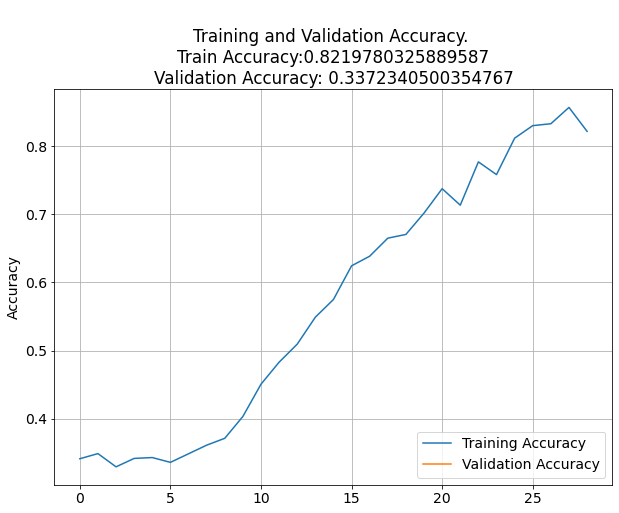

In [ ]:
# store results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
# plot results
# accuracy
plt.figure(figsize=(10, 16))
plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['font.size'] = 14
plt.rcParams['axes.grid'] = True
plt.rcParams['figure.facecolor'] = 'white'
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.title(f'\nTraining and Validation Accuracy. \nTrain Accuracy:{str(acc[-1])}\nValidation Accuracy: {str(val_acc[-1])}')

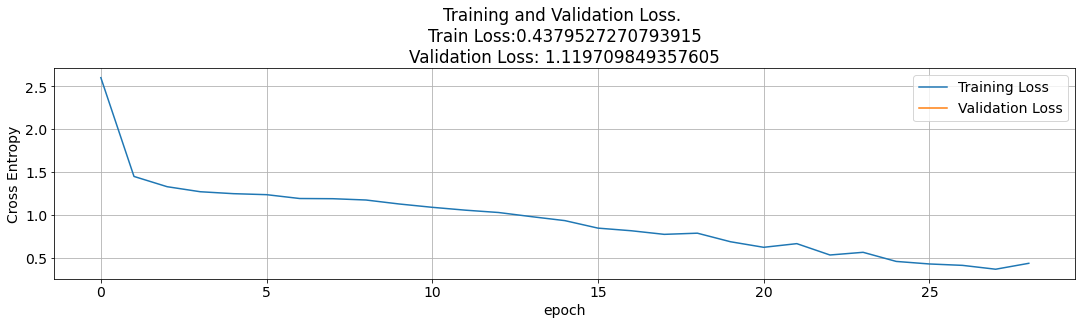

In [ ]:
plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title(f'Training and Validation Loss. \nTrain Loss:{str(loss[-1])}\nValidation Loss: {str(val_loss[-1])}')
plt.xlabel('epoch')
plt.tight_layout(pad=3.0)
plt.show()

In [ ]:
print(test_x.shape)


(1968, 300, 300, 3)


In [ ]:
test_loss, test_acc = loaded_model.evaluate(test_x, test_y)

print('Test accuracy: {:2.2f}%'.format(test_acc*100))

30/30 [==============================] - 154s 5s/step - loss: 1.2959 - accuracy: 0.5787
Test accuracy: 57.87%


In [ ]:
# class_names = df['class'].unique()
# predictions = []
# real_val=[]
# i=0

# #for image in sample.id:
# for img in df['id'][20:50]:
#   # print(img)
#   # if img in df['id'][:577]:
#     # img = tf.keras.preprocessing.image.load_img("/content/drive/MyDrive/dataset/test/"+img_fold+'/'+test_x)
#       image = img

#       class_idx = df['id'].tolist().index(img)
#       real_val.append(df['class'][class_idx])
#       img = img = tf.keras.preprocessing.image.load_img("/content/drive/MyDrive/dataset/train/"+df['class'][class_idx]+'/'+img)
#       img = tf.keras.preprocessing.image.img_to_array(img)
#       img = tf.keras.preprocessing.image.smart_resize(img, (300, 300))
#       img = tf.reshape(img, (-1, 300, 300, 3))
#       prediction = model.predict(img/255)
#       predictions.append(class_names[np.argmax(prediction)])
#       plt.figure(figsize=[15, 10])
#       img1 = cv2.imread("/content/drive/MyDrive/dataset/train/"+df['class'][class_idx]+'/'+image)
#       plt.subplot(5, 5, 1)
#       plt.imshow(img1)
#       plt.title(class_names[np.argmax(prediction)])
#       plt.axis('off')

In [ ]:
print(Y[0])

[0. 0. 0. 0. 1.]


In [ ]:
# y_pred = loaded_model.predict(test_x) # Make predictions towards the test set
Y_pred=loaded_model.predict(images)


7/7 [==============================] - 37s 5s/step


In [ ]:
Y_pred_classes=np.argmax(Y_pred,axis=1)

In [ ]:
# np.argmax(predictions[0]), test_y[0] # If same, got it right


In [ ]:
y_test=np.argmax(Y,axis=1)

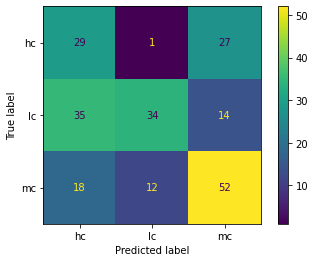

In [ ]:
clabels = ['hc', 'lc','mc']
cm =confusion_matrix(y_test, Y_pred_classes)
cmd = ConfusionMatrixDisplay(cm, display_labels=clabels)
cmd.plot()

#Adding to benchmark csv

In [ ]:
# load resized ottawa benchmark set
dir_path = r'/content/drive/MyDrive/Traffic Prediction/resized ottawa benchmark set/test'
# Iterate directory
for os_folder in os.listdir(dir_path):
  if os.path.isdir(os.path.join(dir_path, os_folder)):
    for fold in os.listdir(dir_path+'/'+os_folder):
      if os.path.isdir(os.path.join(dir_path+'/'+os_folder, fold)):
        count = 0
        for path in os.listdir(dir_path+'/'+ os_folder + '/' + fold):
            # check if current path is a file
            if os.path.isfile(os.path.join(dir_path+'/'+ os_folder + '/' + fold, path)):
                count += 1
        print(os_folder, fold, count)        

In [ ]:
bm = pd.read_csv("/content/drive/MyDrive/Traffic Prediction/resized ottawa benchmark set/benchmark.csv")
bm.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Dhanya,Dhanya.1,Dhanya.2
0,NaN,Unnamed: 0.1,Unnamed: 0,jpg_uid,jpg_name,csv_img_name,cam_number,jpg_timestamp,Clustered,camera_loc,...,blurry_yolo_use,blurry_yolo_class,blurry_yolo_pred,blurry_yolo_score,ground_truth,test_set,prev_ground_truth,in_efficientnetB3,class_effB3,group_effB3
1,0.0,0,0,2025_2022-12-23-09-50,2022-12-23-09-50_MTO_(MTO) Hwy 416 NB ramp to ...,202212230950Hwy416NBramptoHwy417Eastjpg,2025,2022-12-23-09-50,TRUE,Hwy_416_NB_ramp_to_Hwy_417_East,...,na,na,clear,0.78,Low,FALSE,Low,y,High,train
2,1.0,1,1,2019_2022-12-23-09-50,2022-12-23-09-50_MTO_(MTO) Hwy 417 Near Belfas...,202212230950Hwy417NearBelfastRdjpg,2019,2022-12-23-09-50,TRUE,Hwy_417_Near_Belfast_Rd,...,na,na,clear,0.75,Low,FALSE,Low,y,High,train
3,2.0,2,2,2005_2022-12-23-09-50,2022-12-23-09-50_MTO_(MTO) Hwy 417 between Hol...,202212230950Hwy417betweenHollandAveandParkdale...,2005,2022-12-23-09-50,FALSE,NaN,...,na,na,clear,0.99,Low,FALSE,Low,y,High,train
4,3.0,3,3,2029_2022-12-23-09-50,2022-12-23-09-50_MTO_(MTO) Hwy 417 east of Eag...,202212230950Hwy417eastofEaglesonRdjpg,2029,2022-12-23-09-50,TRUE,Hwy_417_east_of_Eagleson_Rd,...,na,na,clear,0.99,Low,FALSE,Low,y,Low,train


In [ ]:
test_img = bm['Unnamed: 3'][1:]
test_img = list(test_img)

In [10]:
# load model
model = load_model('/content/drive/MyDrive/Traffic Prediction/models/ep30/efficientnet_b3_ep30.h5')

In [ ]:
#read traffic.csv file
df = pd.read_csv('/content/drive/MyDrive/Traffic Prediction/csv/benchmark_test_updated_resized_traffic.csv')
df.head()
train_img = list(df['id'])
print(train_img)

['2006_2022-12-22-13-07.jpg', '2006_2022-12-22-14-25.jpg', '2023_2022-12-22-18-09.jpg', '2006_2022-12-22-18-24.jpg', '2021_2022-12-22-15-19.jpg', '2006_2022-12-22-13-38.jpg', '2021_2022-12-22-12-13.jpg', '2009_2022-12-22-18-24.jpg', '2037_2022-12-22-18-14.jpg', '2021_2022-12-22-13-33.jpg', '2009_2022-12-22-17-04.jpg', '2023_2022-12-22-14-43.jpg', '2006_2022-12-22-12-32.jpg', '2006_2022-12-22-13-59.jpg', '2006_2022-12-22-15-02.jpg', '2021_2022-12-22-15-55.jpg', '2006_2022-12-22-13-15.jpg', '2006_2022-12-22-12-08.jpg', '2009_2022-12-22-18-44.jpg', '2008_2022-12-22-17-04.jpg', '2006_2022-12-22-12-57.jpg', '2007_2022-12-22-12-52.jpg', '2008_2022-12-22-18-19.jpg', '2020_2022-12-22-12-39.jpg', '2023_2022-12-22-13-59.jpg', '2007_2022-12-22-14-43.jpg', '2023_2022-12-22-15-02.jpg', '2022_2022-12-22-15-38.jpg', '2023_2022-12-22-15-19.jpg', '2009_2022-12-22-16-48.jpg', '2006_2022-12-22-12-13.jpg', '2022_2022-12-22-15-55.jpg', '2021_2022-12-22-13-38.jpg', '2021_2022-12-22-12-52.jpg', '2007_2022-12

In [ ]:
#load paths of training images
im_size=300
path="/content/drive/MyDrive/Traffic Prediction/resized ottawa benchmark set"
# path = '/content/drive/MyDrive/Traffic Prediction/resized ottawa benchmark set'
traffic_level = {0: 'High', 1:'Low', 2:'Medium'}
# in_unmasked_EfficientNetB3 = ['in_unmasked_EfficientNetB3']
unmasked_EfficientNetB3_use = ['unmasked_EfficientNetB3_use']
unmasked_EfficientNetB3_pred = ['unmasked_EfficientNetB3_pred']
unmasked_EfficientNetB3_score = ['unmasked_EfficientNetB3_score']

for i in range(len(test_img)):
  if type(bm['Unnamed: 20'][i+1]) is not float or not math.isnan(bm['Unnamed: 20'][i+1]):
    if bm['Unnamed: 21'][i+1] == 'FALSE':
        img = cv2.imread(path + '/train/' + bm['Unnamed: 20'][i+1] + '/' + test_img[i] + '.jpg')
        # print(path+'/train/'+bm['Unnamed: 20'][i+1] + '/' +test_img[i] + '.jpg')
        # print(bm['Unnamed: 20'][i+1])
        # print(test_img[i])
    else: 
      img = cv2.imread(path + '/test/' + bm['Unnamed: 20'][i+1] + '/' + test_img[i] + '.jpg')

    image = img.reshape(1,300,300,3)
    # image = cv2.resize(img, (im_size, im_size))
    if bm['Unnamed: 20'][i+1] != 'Blurry' and bm['Unnamed: 20'][i+1] != 'Camera_off':
      output = model.predict(image)
      op_arg = np.argmax(output, axis=1)
      # print(output[0][op_arg[0]])
      # print(traffic_level[op_arg[0]])
      unmasked_EfficientNetB3_score.append(output[0][op_arg[0]])
      unmasked_EfficientNetB3_pred.append(traffic_level[op_arg[0]])
      if str(i)+'.jpg' in train_img:
        unmasked_EfficientNetB3_use.append('train')
      else:
        unmasked_EfficientNetB3_use.append('test')
    else:
      unmasked_EfficientNetB3_pred.append('NA')
      unmasked_EfficientNetB3_score.append('NA')
      unmasked_EfficientNetB3_use.append('NA')
    
  else:
    unmasked_EfficientNetB3_pred.append('NA')
    unmasked_EfficientNetB3_score.append('NA')
    unmasked_EfficientNetB3_use.append('NA')

1/1 [==============================] - 0s 126ms/step


KeyboardInterrupt: ignored

In [ ]:
bm['Akito'] = unmasked_EfficientNetB3_use
bm['Akito.1'] = unmasked_EfficientNetB3_pred
bm['Akito.2'] = unmasked_EfficientNetB3_score
bm.to_csv('/content/drive/MyDrive/Traffic Prediction/csv/benchmark_train_test(sec_ep30).csv')

In [ ]:
from google.colab.patches import cv2_imshow

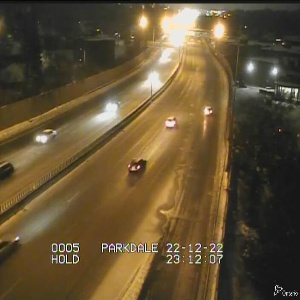

(300, 300, 3)


In [ ]:
img=cv2.imread('/content/drive/MyDrive/Traffic Prediction/resized ottawa benchmark set/train/Low/2005_2022-12-22-23-17.jpg')
cv2_imshow(img)
print(img.shape)